#Homework 2
Author: ruth wang
Date: May 10, 2015

In [19]:
!pip install seaborn 
#import packages
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
from seaborn import plt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
import math
from random import shuffle, seed

You are using pip version 6.1.1, however version 7.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
# Load in the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['Target'] = iris.target
print 'iris data head:'
print iris_df.head()
print 'iris describe():'
print iris_df.describe()

print "label set: " + repr(iris_df['Target'].unique())

iris data head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
iris describe():
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000      

In [21]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


KNN classification

In [22]:
# split the data into training and test data set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=12)

In [23]:
n_neighbors = range(1,16)

scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

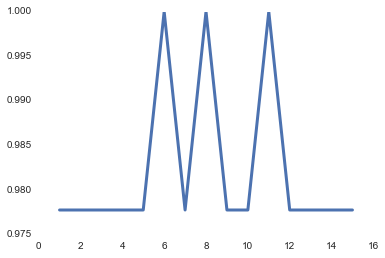

In [24]:
plt.plot(n_neighbors, scores, linewidth=3.0)

Cross validation

In [25]:
# when k=7, we get the most optimimal results
clf = neighbors.KNeighborsClassifier(7, weights='uniform')
clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)

In [26]:
print scores
print scores.mean()

[ 0.96666667  1.          0.96666667  0.96666667  1.        ]
0.98


Finding optimal K

In [27]:
scores_list =[]
n_neighbors = range(1,15)
for n in n_neighbors :
    clf = neighbors.KNeighborsClassifier(n, weights='uniform')
    clf.fit(iris.data, iris.target)
    scores = cross_val_score(clf, iris.data, iris.target, cv=5)
    scores_list.append(scores.mean())
    
best_k = n_neighbors[np.argmax(scores_list)]
print "Best k value: %s" % best_k

Best k value: 6


(0.94, 0.99)

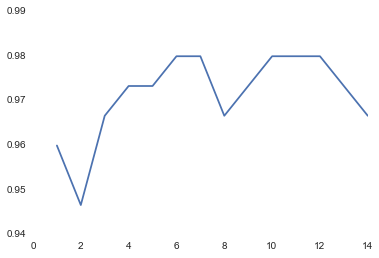

In [28]:
plt.plot(n_neighbors, scores_list)
plt.ylim(0.94,0.99)
# K=6 gives the highest accuracy using 5-fold cross validation w/o overfitting data
# As K increases, accuracy starts to fluctuate and decline 

K-fold Cross validation scoring function

In [29]:
# create the cross_validation scoring funciton
def k_fold_cross_validation_scroes(func, data, target, k_fold):
    import random
    scores = []
    # randomize data first
    data_set = zip(iris.data, iris.target)
    #random.seed(0) 
    shuffle(data_set)
    data2, target2 = zip(*data_set)
    # create training and validation sets
    for k in xrange(k_fold):
        X_train = [x for i, x in enumerate(data2) if i % k_fold != k]
        Y_train = [x for i, x in enumerate(target2) if i % k_fold != k]
        X_test = [x for i, x in enumerate(data2) if i % k_fold == k]
        Y_test = [x for i, x in enumerate(target2) if i % k_fold == k]
        #accuracy scores
        func.fit(X_train, Y_train)
        scores.append(func.score(X_test, Y_test))
    return np.mean(scores)

In [30]:
# test the cross validation function for KNN when n =7
clf = neighbors.KNeighborsClassifier(7, weights='uniform')
my_score = k_fold_cross_validation_scroes(clf, iris_df, iris.target,k_fold = 5)
sk_score = cross_val_score(clf, iris.data, iris.target, cv=5).mean()
print "my score is %s"% my_score
print "SK score is %s"% sk_score

my score is 0.966666666667
SK score is 0.98


extra credit 1:
Using the value of K obtained in (3) above, vary the number of folds used for cross-validation across an interesting range, e.g. [ 2, 3, 5, 6, 10, 15]. How does classifier accuracy vary with the number of folds used? Do you think there exists an optimal number of folds to use for this particular problem? Why or why not? ￼

In [37]:
# from last exercise n = 7
k_fold = range(2,15)
clf = neighbors.KNeighborsClassifier(7, weights='uniform')
clf.fit(iris.data, iris.target)
scores = []
for k in k_fold:
    accuracy= cross_val_score(clf, iris.data, iris.target, cv=k).mean()
    scores.append(accuracy)
print scores

[0.93999999999999995, 0.97344771241830064, 0.96634615384615385, 0.98000000000000009, 0.97299382716049376, 0.96683673469387743, 0.96626984126984117, 0.97407407407407398, 0.96666666666666679, 0.96818181818181825, 0.96666666666666667, 0.96794871794871784, 0.96825396825396826]


(0.94, 0.99)

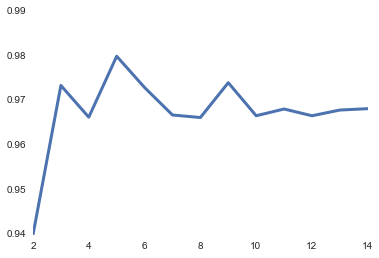

In [38]:
plt.plot(k_fold, scores, linewidth=3.0)
plt.ylim(0.94,0.99)

When K = 5, it reaches highest accuracy. For this particular problem, the most optimal K =  5. 
When K = 5, the training and test set split is 80/20. When K is smaller than 5, we might underfit the data; when K is larger than 5, we might overfit the data. Therefore, we usually use 5-fold cross validation for most of the problems.

EXTRA CREDIT 2:Write your own implementation of KNN classification in Python, without using the methods from sklearn. Compare your results with the results you obtained using sklearn.

In [39]:
from operator import itemgetter
from scipy.stats import mode

In [60]:
class KNNC:
    def __init__(self,k):
        self._k = k

    # first define euclidian distance function
    def euclidean_distance(self,x1,x2):
        return math.sqrt(sum(pow(a-b,2) for a, b in zip(x1, x2)))
    
    #fit method
    def fit(self,X,y):
        self._X = X
        self._y = y
    
    def predict(self, X_test_instance):
        distances = {}
        for i in range(len(self._X)):
            distances[i] = self.euclidean_distance(X_test_instance, self._X[i])
        
        # sort distance dictionary by ascending order
        sorted_dist = sorted(distances.items(), key=itemgetter(1))
        
        classes = []
        # for the k nearest neighbors
        for tpl in sorted_dist[0:self._k]:
            # find the y classification
            classes.append(self._y[tpl[0]])
            
        # find the most common classification
        predict_class = mode(classes)[0][0]
        return predict_class
    
    # score method
    def score(self, X, y):
        predict_vals = []   
        for i in range(len(X)):            
            predict_vals.append(int(self.predict(X[i]) == y[i]))
            
        return np.mean(predict_vals)

In [63]:
k=6
myknn = KNNC(k)
clf = neighbors.KNeighborsClassifier(k)         
my_score = k_fold_cross_validation_scroes(myknn,iris.data,iris.target,3)
sk_score = k_fold_cross_validation_scroes(clf,iris.data,iris.target,3)

print "My score: %s" % my_score
print "SK score: %s" % sk_score


My score: 0.96
SK score: 0.96
